## Import packages

In [29]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Check GPU
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Utils

In [31]:
def plot_image(
    image: np.ndarray,
    y_true: np.ndarray,
    y_pred: np.ndarray = None,
    shape: tuple[int, int] = (2, 4),  # rows, cols
) -> None:
    random_index = np.random.randint(0, image.shape[0], shape[0] * shape[1])
    _, axes = plt.subplots(shape[0], shape[1], figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        color = "green" if y_true[random_index[i]] == y_pred[random_index[i]] else "red"
        ax.imshow(image[random_index[i]], cmap="gray")
        ax.axis("off")
        ax.set_title(f"True: {y_true[random_index[i]]}", color=color)
        if y_pred is not None:
            ax.set_title(
                f"True: {y_true[random_index[i]]}, Pred: {y_pred[random_index[i]]}"
            )

    plt.tight_layout()
    plt.show()

## Import dataset

In [32]:
mnist = keras.datasets.mnist.load_data()

In [33]:
(X_train, y_train), (X_test, y_test) = mnist

### Normalize data

In [34]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Train model

In [35]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [36]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 563us/step - accuracy: 0.8578 - loss: 0.4879
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9550 - loss: 0.1525
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.9679 - loss: 0.1040
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9740 - loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.9773 - loss: 0.0735
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9795 - loss: 0.0638
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9809 - loss: 0.0578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9835 - loss: 0.0511
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9843 - loss: 0.0449
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9857 - loss: 0.0427


In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print(f"Loss: {loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9759 - loss: 0.0830
Accuracy: 0.98
Loss: 0.07


In [40]:
predictions = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


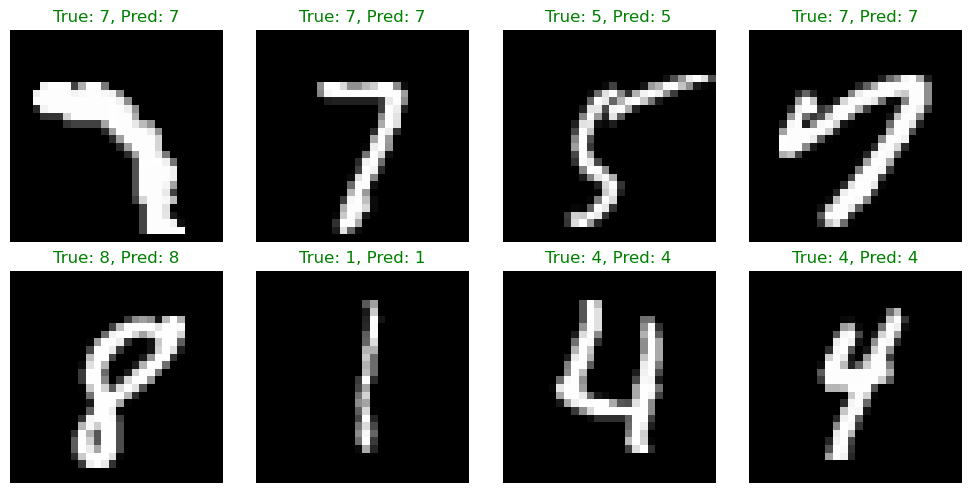

In [41]:
plot_image(X_test, y_test, predictions)

In [42]:
model.save("mnist_model.keras")